<a href="https://colab.research.google.com/github/EritonPalma/Challenge-Alura-Store---Desafio-1-/blob/main/AluraStoreBrasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()
loja.tail()
loja.shape
loja.columns
loja3.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Produto                 2359 non-null   object 
 1   Categoria do Produto    2359 non-null   object 
 2   Preço                   2359 non-null   float64
 3   Frete                   2359 non-null   float64
 4   Data da Compra          2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Local da compra         2359 non-null   object 
 7   Avaliação da compra     2359 non-null   int64  
 8   Tipo de pagamento       2359 non-null   object 
 9   Quantidade de parcelas  2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.3+ KB


#1. Análise do faturamento



In [13]:
# Calcular o faturamento total das lojas 1, 2, 3 e 4
faturamento_loja1 = loja['Preço'].sum()
faturamento_loja2 = loja2['Preço'].sum()
faturamento_loja3 = loja3['Preço'].sum()
faturamento_loja4 = loja4['Preço'].sum()

print(f"O Faturamento Total da Loja 1: R$ {faturamento_loja1:,.2f}")
print(f"O Faturamento Total da Loja 2: R$ {faturamento_loja2:,.2f}")
print(f"O Faturamento Total da Loja 3: R$ {faturamento_loja3:,.2f}")
print(f"O Faturamento Total da Loja 4: R$ {faturamento_loja4:,.2f}")

O Faturamento Total da Loja 1: R$ 1,534,509.12
O Faturamento Total da Loja 2: R$ 1,488,459.06
O Faturamento Total da Loja 3: R$ 1,464,025.03
O Faturamento Total da Loja 4: R$ 1,384,497.58


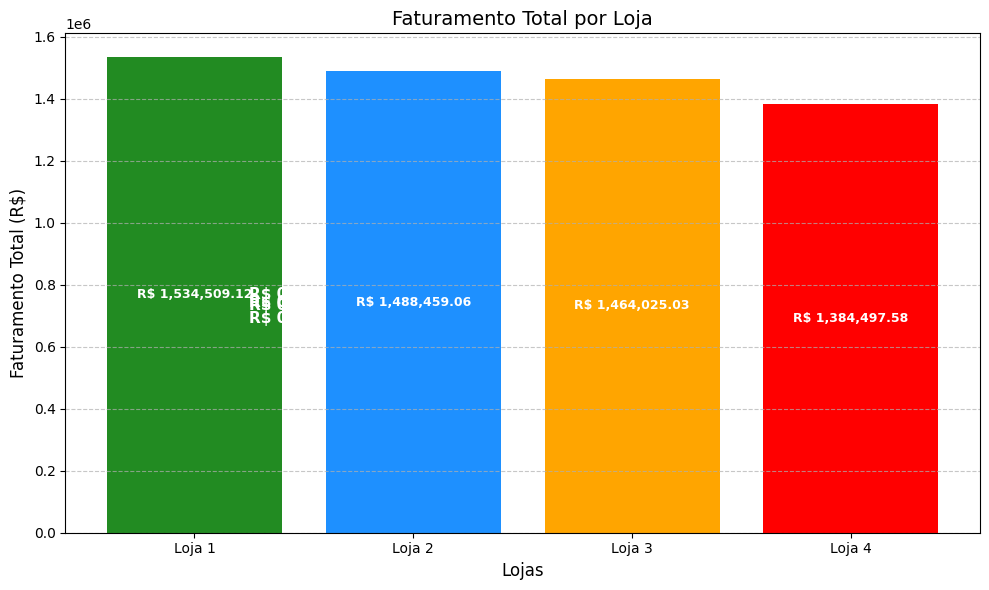


** A loja com o menor faturamento é a Loja 4 com R$ 1,384,497.58 **.


In [50]:
import matplotlib.pyplot as plt

# Preparar os dados para geração do gráfico de colunas do faturamento
# total de cada loja
nomes_lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
faturamentos = [faturamento_loja1, faturamento_loja2, faturamento_loja3, faturamento_loja4]

#  Identificar a loja com menor faturamento
loja_menor_fat = nomes_lojas[faturamentos.index(min(faturamentos))]

# Criar gráfico de coluna
plt.figure(figsize=(10, 6))
barras = plt.bar(nomes_lojas, faturamentos, color=cores_finais)

# Adicionando o valor do faturamento dentro de cada coluna
for barra in barras:
    yval = barra.get_height()
    # Posição Y: Colocamos o texto a aproximadamente 50% da altura da barra
    # Cor do Texto: Branco ou Preto para garantir contraste com a cor da barra
    cor_texto = 'white' if yval > (max(faturamentos) * 0.20) else 'black'

    plt.text(barra.get_x() + barra.get_width()/2, yval * 0.50, # 50% da altura da barra
             f'R$ {yval:,.2f}',
             ha='center', # Centralizado horizontalmente
             va='center', # Centralizado verticalmente
             fontsize=9,
             color=cor_texto,
             fontweight='bold')

# Configurar gráfico de colunas
plt.title('Faturamento Total por Loja', fontsize=14)
plt.xlabel('Lojas', fontsize=12)
plt.ylabel('Faturamento Total (R$)', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Exibir gráfico de colunas
plt.show()

# Conclusão
faturamento_minimo = min(faturamentos)
print(f"\n** A loja com o menor faturamento é a {loja_menor_fat} com R$ {faturamento_minimo:,.2f} **.")

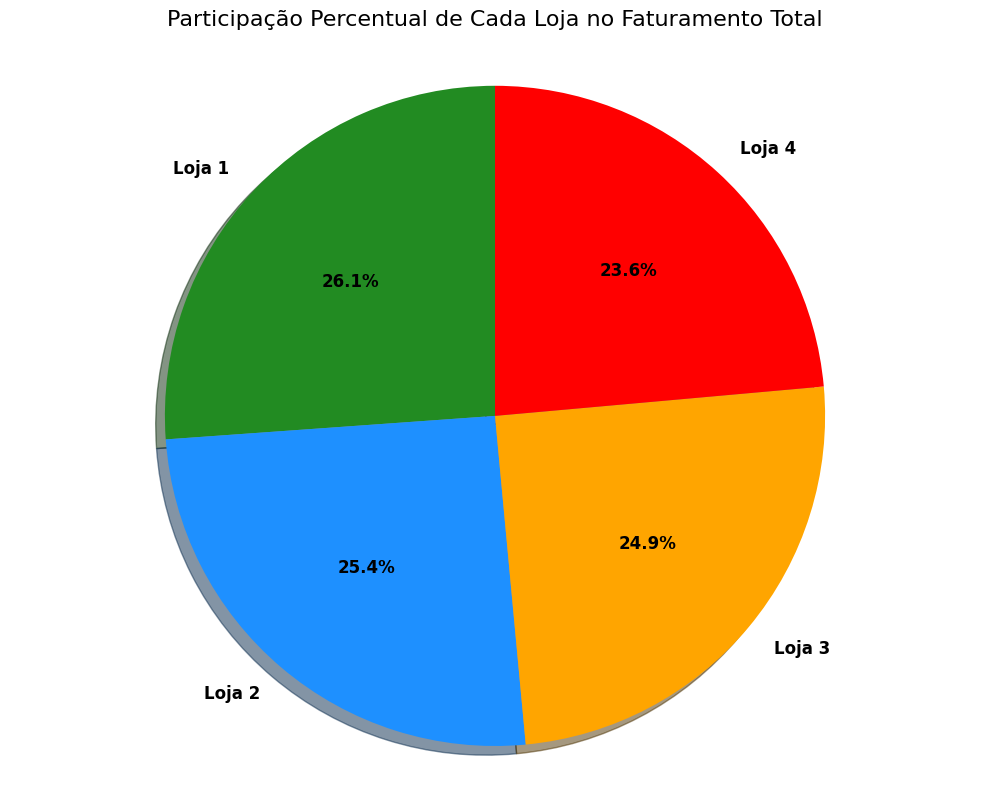


** A loja com o menor participação no faturamento é a Loja 4 com participação de  23.6 **.


In [63]:
# Criação do gráfico de pizza
plt.figure(figsize=(10, 8))
plt.pie(faturamentos,
        labels=nomes_lojas,
        colors=cores_finais,
        autopct='%1.1f%%',
        shadow=True,
        startangle=90,
        textprops={'fontsize': 12, 'fontweight': 'bold', 'color': 'black'})

# Adicionando título
plt.title('Participação Percentual de Cada Loja no Faturamento Total', fontsize=16, pad=20)

# Garante que o gráfico seja um círculo
plt.axis('equal')
plt.tight_layout()

# Exibindo o gráfico
plt.show()

# Conclusão
faturamento_total_geral = sum(faturamentos)
# Define loja_menor_fat_index antes de usá-lo
loja_menor_fat_index = faturamentos.index(min(faturamentos))
loja_menor_fat = nomes_lojas[loja_menor_fat_index]
participacao_menor_fat = (min(faturamentos) / faturamento_total_geral) * 100

print(f"\n** A loja com o menor participação no faturamento é a {loja_menor_fat} com participação de  {participacao_menor_fat:,.1f} **.")

## Resumo dos Indicadores por Loja ##
|  Loja  | Faturamento Total |   Nº de Vendas     |  Ticket Médio    |
| Loja 1 |   R$ 1,534,509.12 |      2359          |    R$ 650.49     |
| Loja 2 |   R$ 1,488,459.06 |      2359          |    R$ 630.97     |
| Loja 3 |   R$ 1,464,025.03 |      2359          |    R$ 620.61     |
| Loja 4 |   R$ 1,384,497.58 |      2358          |    R$ 587.15     |


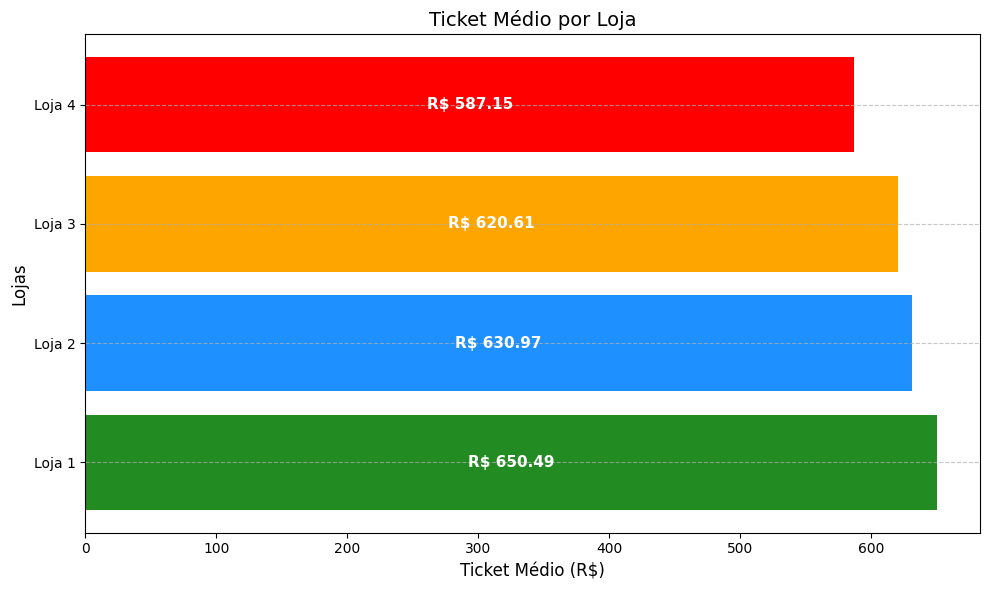

In [53]:
# 2. Cálculo do Número de Vendas
vendas_loja1 = loja.shape[0]
vendas_loja2 = loja2.shape[0]
vendas_loja3 = loja3.shape[0]
vendas_loja4 = loja4.shape[0]

# 3. Cálculo do Ticket Médio (Faturamento / Vendas)
ticket_loja1 = faturamento_loja1 / vendas_loja1
ticket_loja2 = faturamento_loja2 / vendas_loja2
ticket_loja3 = faturamento_loja3 / vendas_loja3
ticket_loja4 = faturamento_loja4 / vendas_loja4

# Impressão dos Resultados
print(f"## Resumo dos Indicadores por Loja ##")
print(f"|  Loja  | Faturamento Total |   Nº de Vendas     |  Ticket Médio    |")
print(f"| Loja 1 |   R$ {faturamento_loja1:,.2f} |      {vendas_loja1}          |    R$ {ticket_loja1:,.2f}     |")
print(f"| Loja 2 |   R$ {faturamento_loja2:,.2f} |      {vendas_loja2}          |    R$ {ticket_loja2:,.2f}     |")
print(f"| Loja 3 |   R$ {faturamento_loja3:,.2f} |      {vendas_loja3}          |    R$ {ticket_loja3:,.2f}     |")
print(f"| Loja 4 |   R$ {faturamento_loja4:,.2f} |      {vendas_loja4}          |    R$ {ticket_loja4:,.2f}     |")

# Preparação dos dados para o gráfico de barras
nomes_lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
tickets_medios = [ticket_loja1, ticket_loja2, ticket_loja3, ticket_loja4]

# Encontrando a loja com menor Ticket Médio
loja_menor_ticket_index = tickets_medios.index(min(tickets_medios))
loja_menor_ticket = nomes_lojas[loja_menor_ticket_index]

# Criação do gráfico de barras para Ticket Médio
plt.figure(figsize=(10, 6))
barras = plt.barh(nomes_lojas, tickets_medios, color=cores_finais)

# Adicionando o valor do Ticket Médio DENTRO de cada barra
for barra in barras:
    width = barra.get_width() # O valor do Ticket Médio
    # Posição X: Aproximadamente 50% da largura da barra
    x_pos = width * 0.50
    # Posição Y: Centro vertical da barra
    y_pos = barra.get_y() + barra.get_height() / 2

    # Adiciona o texto, garantindo cor branca para contraste na maioria das barras
    plt.text(x_pos, y_pos,
             f'R$ {width:,.2f}',
             ha='center', va='center', fontsize=11,
             color='white', fontweight='bold')

# Configurações do gráfico
plt.title('Ticket Médio por Loja', fontsize=14)
plt.xlabel('Ticket Médio (R$)', fontsize=12)
plt.ylabel('Lojas', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Exibindo o gráfico
plt.show()



# 2. Vendas por Categoria

In [54]:
# Calcular a qtde de produtos vendidos por categoria do produto e contar o número de vendas em cada categoria

vendas_por_categoria1 = loja.groupby('Categoria do Produto').size()
vendas_por_categoria2 = loja2.groupby('Categoria do Produto').size()
vendas_por_categoria3 = loja3.groupby('Categoria do Produto').size()
vendas_por_categoria4 = loja4.groupby('Categoria do Produto').size()


# Converter a Series resultante para um DataFrame e dar um nome à coluna de contagem
vendas_por_categoria1 = vendas_por_categoria1.reset_index(name='Total de Vendas por Categoria - Loja 1')
vendas_por_categoria2 = vendas_por_categoria2.reset_index(name='Total de Vendas por Categoria - Loja 2')
vendas_por_categoria3 = vendas_por_categoria3.reset_index(name='Total de Vendas por Categoria - Loja 3')
vendas_por_categoria4 = vendas_por_categoria4.reset_index(name='Total de Vendas por Categoria - Loja 4')

# Ordenar o resultado para visualizar as categorias mais vendidas primeiro
categorias_populares1 = vendas_por_categoria1.sort_values(
    by='Total de Vendas por Categoria - Loja 1',
    ascending=False
)

categorias_populares2 = vendas_por_categoria2.sort_values(
    by='Total de Vendas por Categoria - Loja 2',
    ascending=False
)

categorias_populares3 = vendas_por_categoria3.sort_values(
    by='Total de Vendas por Categoria - Loja 3',
    ascending=False
)

categorias_populares4 = vendas_por_categoria4.sort_values(
    by='Total de Vendas por Categoria - Loja 4',
    ascending=False
)

# Exibir o resultado
print("--- 📊 Quantidade de Produtos Vendidos por Categoria na Loja 1 ---")
print(categorias_populares1)

print("--- 📊 Quantidade de Produtos Vendidos por Categoria na Loja 2 ---")
print(categorias_populares2)

print("--- 📊 Quantidade de Produtos Vendidos por Categoria na Loja 3 ---")
print(categorias_populares3)

print("--- 📊 Quantidade de Produtos Vendidos por Categoria na Loja 4 ---")
print(categorias_populares4)




--- 📊 Quantidade de Produtos Vendidos por Categoria na Loja 1 ---
    Categoria do Produto  Total de Vendas por Categoria - Loja 1
6                 moveis                                     465
2            eletronicos                                     448
0             brinquedos                                     324
1       eletrodomesticos                                     312
3        esporte e lazer                                     284
4  instrumentos musicais                                     182
5                 livros                                     173
7  utilidades domesticas                                     171
--- 📊 Quantidade de Produtos Vendidos por Categoria na Loja 2 ---
    Categoria do Produto  Total de Vendas por Categoria - Loja 2
6                 moveis                                     442
2            eletronicos                                     422
0             brinquedos                                     313
1       eletrodomestico

In [61]:
# Consolidar os DataFrames de cada loja em um único DataFrame
todas_lojas = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)

# Calcular a qtde de produtos vendidos por categoria do produto
# e contar o número de vendas em cada categoria
vendas_por_categoria = todas_lojas.groupby('Categoria do Produto').size()

# Converter a Series resultante para um DataFrame e dar um nome
# à coluna de contagem
vendas_por_categoria = vendas_por_categoria.reset_index(name='Total de Vendas por Categoria - Todas Lojas')

# Ordenar o resultado para visualizar as categorias mais vendidas primeiro
categorias_mais_vendidas = vendas_por_categoria.sort_values(
    by='Total de Vendas por Categoria - Todas Lojas'),
    ascending=False
)

# Exibir o resultado
print("--- Ranking das Categorias Mais Vendidas nas 4 Lojas) ---")
print(categorias_mais_vendidas)


IndentationError: unexpected indent (ipython-input-2807263745.py, line 15)

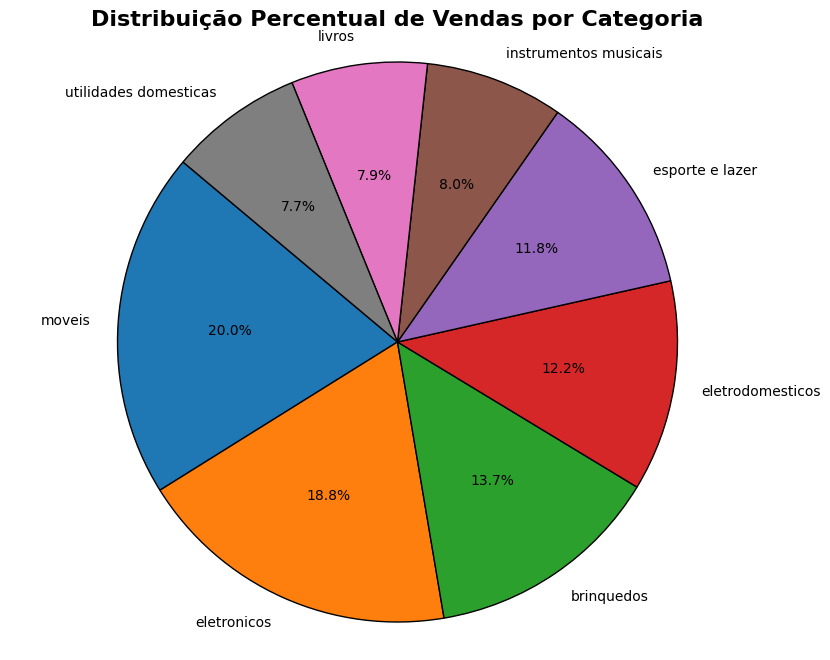

In [58]:
# --- Geração do Gráfico de Pizza ---

# Definir os dados para o gráfico
vendas = categorias_mais_vendidas['Total de Vendas por Categoria - Todas Lojas']
categorias = categorias_mais_vendidas['Categoria do Produto']

# Configurar o gráfico de pizza
plt.figure(figsize=(10, 8))
plt.pie(
    vendas,
    labels=categorias,
    autopct='%1.1f%%',
    startangle=140,
    wedgeprops={'edgecolor': 'black'}
)

# Adicionar título
plt.title('Distribuição Percentual de Vendas por Categoria', fontsize=16, fontweight='bold')

# Garantir que o gráfico seja um círculo
plt.axis('equal')

# Exibir o gráfico
plt.show()

# 3. Média de Avaliação das Lojas


In [67]:
# Calcular a média da Avaliação da compra para cada loja
media_loja1 = loja['Avaliação da compra'].mean()
media_loja2 = loja2['Avaliação da compra'].mean()
media_loja3 = loja3['Avaliação da compra'].mean()
media_loja4 = loja4['Avaliação da compra'].mean()

# 3. Organizar os resultados em um DataFrame para facilitar a comparação
dados_medias = {
    'Loja': ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'],
    'Média da Avaliação': [media_loja1, media_loja2, media_loja3, media_loja4]
}

df_medias = pd.DataFrame(dados_medias)

# Ordenar por avaliação para ver qual loja teve a melhor média
df_medias_ordenado = df_medias.sort_values(
    by='Média da Avaliação',
    ascending=False
).reset_index(drop=True)

# Exibir os resultados
print("--- Média da Avaliação de Compra por Loja ---")
print(df_medias_ordenado.to_markdown(index=False, floatfmt=".2f"))

--- Média da Avaliação de Compra por Loja ---
| Loja   |   Média da Avaliação |
|:-------|---------------------:|
| Loja 3 |                 4.05 |
| Loja 2 |                 4.04 |
| Loja 4 |                 4.00 |
| Loja 1 |                 3.98 |


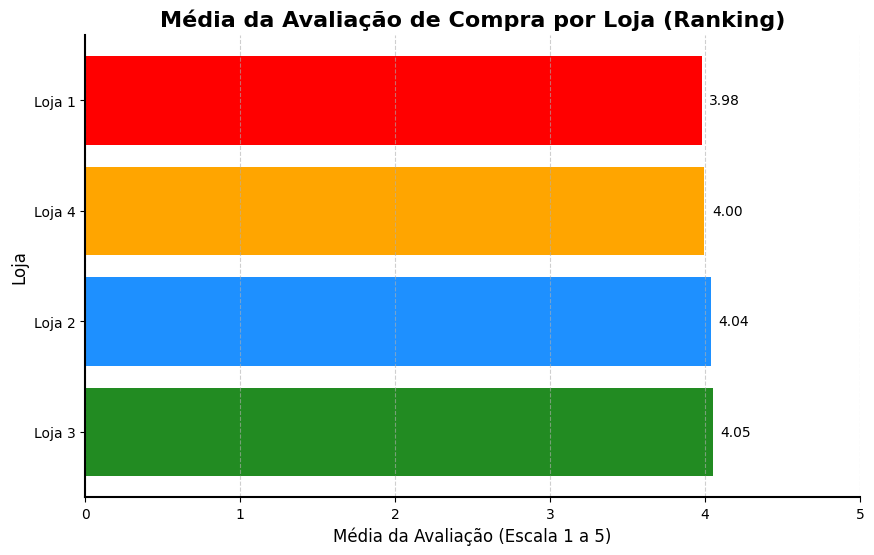

In [69]:
# --- Geração do Gráfico de Barras Horizontais ---

# Extrair dados para o gráfico
lojas = df_medias_ordenado['Loja']
medias = df_medias_ordenado['Média da Avaliação']

# Criar a figura e os eixos
plt.figure(figsize=(10, 6))

# Gerar o gráfico de barras horizontais
# Invertemos o eixo y para que a loja com a melhor avaliação fique no topo
bars = plt.barh(lojas, medias, color=cores_finais)

# Configurações do Título e Rótulos
plt.title('Média da Avaliação de Compra por Loja (Ranking)', fontsize=16, fontweight='bold')
plt.xlabel('Média da Avaliação (Escala 1 a 5)', fontsize=12)
plt.ylabel('Loja', fontsize=12)

# Limite do eixo X para melhor visualização dos dados (até o máximo de 5.0)
plt.xlim(0, 5.0)

# Adicionar o valor exato da média em cada barra (Data Labels)
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.05, bar.get_y() + bar.get_height()/2,
             f'{width:.2f}',
             ha='left', va='center', fontsize=10)

# Remover a borda superior e direita do gráfico (Ajuste estético)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_linewidth(1.5)
plt.gca().spines['bottom'].set_linewidth(1.5)

# Adicionar grades verticais leves
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Exibir o gráfico
plt.show()

# 4. Produtos Mais e Menos Vendidos

In [ ]:
# Lista de DataFrames para cada loja
dataframes = {
    'Loja 1': loja,
    'Loja 2': loja2,
    'Loja 3': loja3,
    'Loja 4': loja4
}

# Lista para armazenar o produto mais vendido de cada loja
produtos_mais_vendidos = []

print("--- Produtos Mais Vendidos por Loja (Volume de Vendas) ---")

for nome_loja, df_loja in dataframes.items():

    # Agrupar por Produto e contar a qtde de venda por Produto
    vendas_por_produto = df_loja.groupby('Produto').size()

    # Converter a serie para DataFrame, renomear e ordenar
    df_ranking = vendas_por_produto.reset_index(name='Total de Vendas')
    df_ranking_ordenado = df_ranking.sort_values(
        by='Total de Vendas',
        ascending=False
    )

    # Obter o produto mais vendido
    produto_mais_vendido = df_ranking_ordenado.iloc[0]

    # Adicionar à lista de produtos mais vendidos
    produtos_mais_vendidos.append({
        'Loja': nome_loja,
        'Produto Mais Vendido': produto_mais_vendido['Produto'],
        'Total de Vendas': produto_mais_vendido['Total de Vendas']
    })

    # Exibir os 5 produtos mais vendidos por loja
    print(f"\n| {nome_loja} |")
    print("-" * (len(nome_loja) + 5))
    print(df_ranking_ordenado.head(5).to_markdown(index=False))

# Exibir o resumo dos 5 produtos mais vendidos por loja
df_mais_vendido = pd.DataFrame(produtos_mais_vendidos)

print("\n" + "="*50)
print(" Resumo: Produto de Maior Volume de Vendas por Loja")
print("="*50)
print(df_mais_vendido.to_markdown(index=False))

In [ ]:
# Lista de DataFrames para iterar
dataframes = {
    'Loja 1': loja,
    'Loja 2': loja2,
    'Loja 3': loja3,
    'Loja 4': loja4
}

print("--- Ranking dos Produtos mais Vendidos por Loja (Volume de Vendas) ---")

# Vamos iterar sobre cada loja
for nome_loja, df_loja in dataframes.items():

    # Agrupar por 'Produto' (ou 'Nome do Produto' - ajustando para 'Produto' conforme o dataset) e contar as vendas
    vendas_por_produto = df_loja.groupby('Produto').size()

    # Converter para DataFrame, renomear e ordenar
    df_ranking = vendas_por_produto.reset_index(name='Total de Vendas')
    df_ranking_ordenado = df_ranking.sort_values(
        by='Total de Vendas',
        ascending=False
    ).reset_index(drop=True)

    # Exibir o ranking completo da loja
    print(f"\n" + "="*50)
    print(f"| PRODUTOS MAIS VENDIDOS: {nome_loja} |")
    print("="*50)

    # Exibe todas as linhas do DataFrame ordenado
    print(df_ranking_ordenado.to_markdown(index=False))

In [ ]:
# Definir a lista de URLs
URLS = [url, url2, url3, url4]

# Carregar e Consolidar os DataFrames
lista_dataframes = [pd.read_csv(url_item) for url_item in URLS]
dados_totais = pd.concat(lista_dataframes, ignore_index=True)

# A coluna para o nome do produto é 'Produto'
coluna_produto = 'Produto'

# Agrupar por 'Produto' e contar o número total de vendas
vendas_por_produto = dados_totais.groupby(coluna_produto).size()

# Converter para DataFrame, renomear e ordenar
df_ranking_global = vendas_por_produto.reset_index(name='Total de Vendas')

ranking_final = df_ranking_global.sort_values(
    by='Total de Vendas',
    ascending=False
).reset_index(drop=True)

# Exibir o resultado
print("--- Ranking Global de Produtos Mais Vendidos nas 4 Lojas ---")
print(ranking_final.to_markdown(index=False))

In [ ]:
# Carregar e Consolidar os DataFrames
lista_dataframes = [pd.read_csv(url) for url in URLS]
dados_totais = pd.concat(lista_dataframes, ignore_index=True)

coluna_produto = 'Produto'

# 2. Agrupar por 'Produto' e contar o número total de vendas
vendas_por_produto = dados_totais.groupby(coluna_produto).size()

# Converter para DataFrame, renomear e ordenar
df_ranking_global = vendas_por_produto.reset_index(name='Total de Vendas')

# Ordenar por Total de Vendas de forma ASCENDENTE (do menor para o maior)
ranking_final_menos_vendidos = df_ranking_global.sort_values(
    by='Total de Vendas',
    ascending=True # <--- CHAVE para mostrar os MENOS vendidos
).reset_index(drop=True)

# 4. Exibir o resultado
print("--- Ranking Global de Produtos MENOS Vendidos nas 4 Lojas ---")
print(ranking_final_menos_vendidos.to_markdown(index=False))

In [ ]:
# Dicionário de DataFrames para iterar facilmente
dataframes = {
    'Loja 1': loja,
    'Loja 2': loja2,
    'Loja 3': loja3,
    'Loja 4': loja4
}

print("---  Ranking de Produtos MENOS Vendidos (por Loja) ---")

# Vamos iterar sobre cada loja
for nome_loja, df_loja in dataframes.items():

    # Agrupar por 'Produto' e contar as vendas
    vendas_por_produto = df_loja.groupby('Produto').size()

    # Converter para DataFrame, renomear e ordenar
    df_ranking = vendas_por_produto.reset_index(name='Total de Vendas')

    # Ordenar por Total de Vendas de forma ASCENDENTE
    df_ranking_menos_vendidos = df_ranking.sort_values(
        by='Total de Vendas',
        ascending=True
    ).reset_index(drop=True)

    # Exibir o ranking completo da loja
    print(f"\n" + "="*60)
    print(f"| RANKING DE PRODUTOS MENOS VENDIDOS POR LOJA: {nome_loja} |")
    print("="*60)

    # Exibe todas as linhas do DataFrame ordenado
    print(df_ranking_menos_vendidos.to_markdown(index=False))

# 5. Frete Médio por Loja

In [ ]:
# Calcular a média da coluna 'Frete' para cada loja
media_frete_loja1 = loja['Frete'].mean()
media_frete_loja2 = loja2['Frete'].mean()
media_frete_loja3 = loja3['Frete'].mean()
media_frete_loja4 = loja4['Frete'].mean()

# Organizar os resultados em um DataFrame para comparação
dados_frete = {
    'Loja': ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'],
    'Custo Médio do Frete (R$)': [media_frete_loja1, media_frete_loja2, media_frete_loja3, media_frete_loja4]
}

df_fretes = pd.DataFrame(dados_frete)

# Ordenar para ver qual loja tem o frete mais caro/barato
df_fretes_ordenado = df_fretes.sort_values(
    by='Custo Médio do Frete (R$)',
    ascending=False
).reset_index(drop=True)

# Exibir os resultados formatados
print("--- Custo Médio do Frete por Loja ---")
print(df_fretes_ordenado.to_markdown(index=False, floatfmt=".2f"))

In [ ]:
# Carregar e Consolidar os DataFrames
lista_dataframes = [pd.read_csv(url) for url in URLS]
dados_totais = pd.concat(lista_dataframes, ignore_index=True)

# Calcular a média da coluna 'Frete' no DataFrame consolidado
# Esta média representa o custo médio do frete por transação em toda a rede.
custo_medio_frete_total = dados_totais['Frete'].mean()

# 3. Exibir o resultado
print("--- Custo Médio do Frete para as 4 Lojas Juntas ---")
print(f"O custo médio do frete por transação na rede é de: R$ {custo_medio_frete_total:,.2f}")